### this is a description about dataset
###### Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

### **Data Pre-processing steps:**
1. Merge Data
2. Drop unnecessary columns
3. Handle missing values
4. Drop Duplications
5. Detect and handle outliers
6. Encoding categorical data
7. split data into features and labels
8. handle imbalanced data
9. split data into train and test
10. scaling

### 1- import libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv",sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### note: in gender column 1>> means female , 2>> means male

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### drop unnecessary columns

In [6]:
df.drop(columns='id' , inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### handle missing values

In [7]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.duplicated().sum()

24

In [9]:
df.shape

(70000, 12)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(69976, 12)

## detect and handle outliers

<Axes: ylabel='age'>

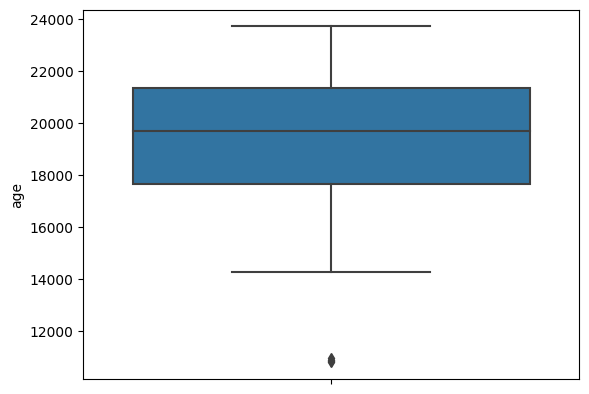

In [12]:
sns.boxplot(data=df , y='age')  # this number of days

#### converted the age from days to years

In [13]:
def days_to_years(days):
  return days // 365

In [14]:
df['age_years']=df['age'].apply(days_to_years)

In [15]:
df.drop('age' , axis=1 , inplace=True) #drop old column

In [16]:
df.insert(0, "age_years", df.pop("age_years"))  # to make it in firt column

In [17]:
df.head()

,age_years,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


<Axes: ylabel='age_years'>

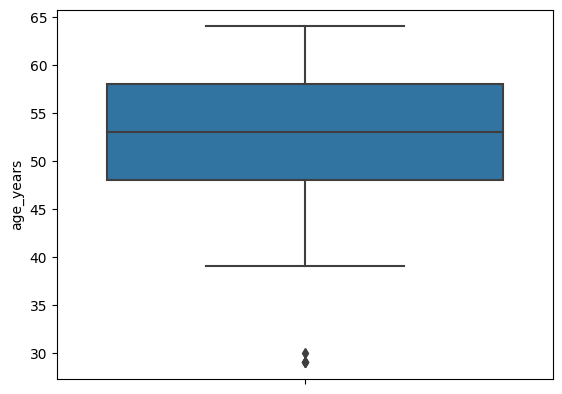

In [18]:
sns.boxplot(data=df , y='age_years')

In [19]:
# Convert height to meters
df['height_m'] = df['height'] / 100

# Compute BMI
df['BMI'] = df['weight'] / (df['height_m'] ** 2)
df = df.drop(columns=['weight', 'height', 'height_m'])


### used IQR to remove the outliers so the number of is reduced 

In [20]:
numerical_cols = ['BMI', 'ap_hi', 'ap_lo']
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
# Apply outlier removal
print("Shape before outlier removal:", df.shape)
df_clean = remove_outliers_iqr(df, numerical_cols)
print("Shape after outlier removal:", df_clean.shape)
# Optional: Visualize outliers before/after (using box plots)


Shape before outlier removal: (69976, 11)
Shape after outlier removal: (62724, 11)


### visiualization the outliers before and after

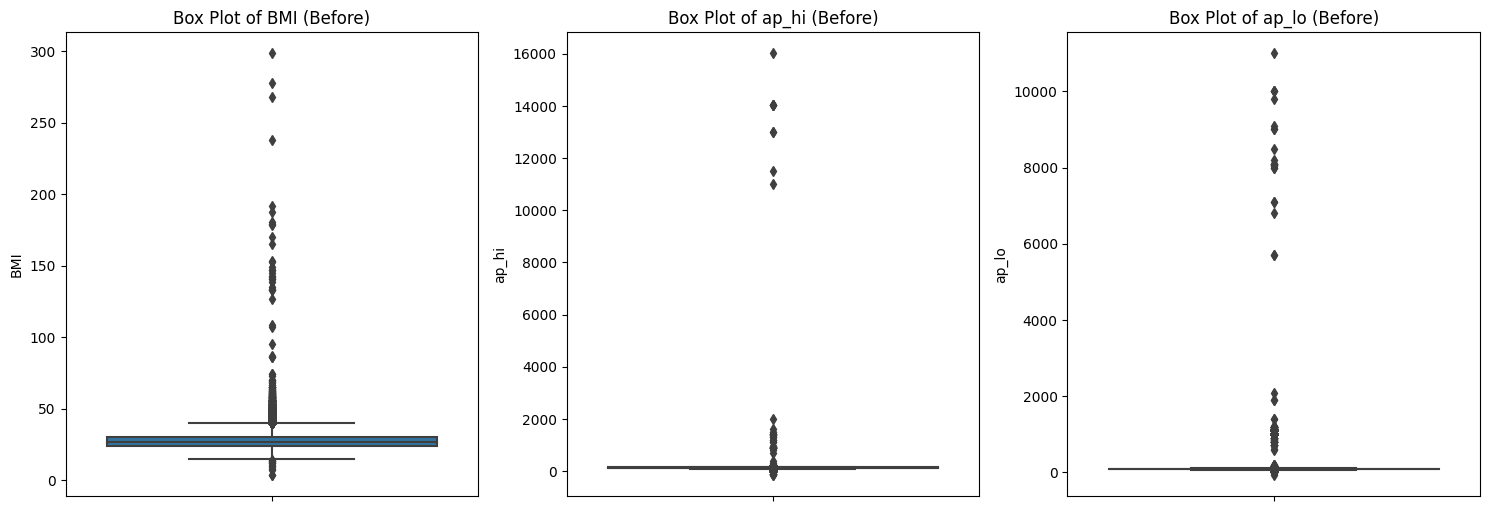

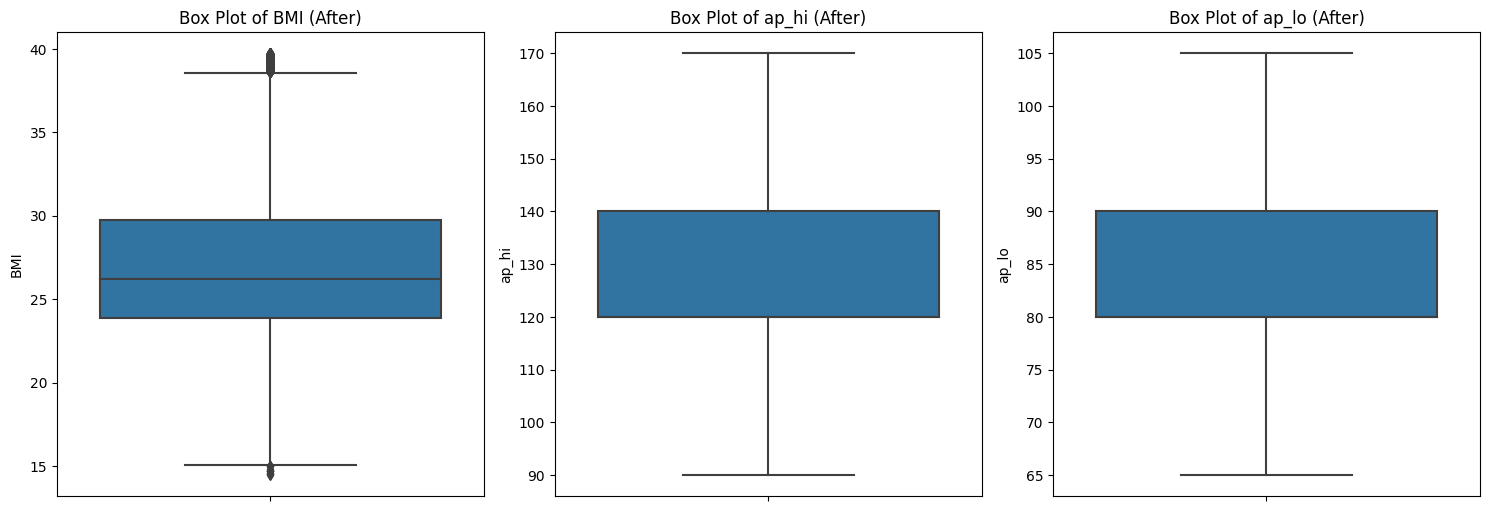

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} (Before)')
plt.tight_layout()
plt.show()
# After cleaning
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Box Plot of {col} (After)')
plt.tight_layout()
plt.show()

### split data into features and target

In [22]:
features = df_clean.drop(columns=['cardio'])

In [23]:
features.head() # this without the target column 

,age_years,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI
0,50,2,110,80,1,1,0,0,1,21.967120
1,55,1,140,90,3,1,0,0,1,34.927679
2,51,1,130,70,3,1,0,0,0,23.507805
3,48,2,150,100,1,1,0,0,1,28.710479
5,60,1,120,80,2,2,0,0,0,29.384676


In [24]:
target = df_clean['cardio']

In [25]:
target.head() # this is just a target column 

0    0
1    1
2    1
3    1
5    0
Name: cardio, dtype: int64

## most is balanced data

In [26]:
df['cardio'].value_counts()

cardio
0    35004
1    34972
Name: count, dtype: int64

# Split Data into train and test

In [27]:
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size=0.25)

## EDA

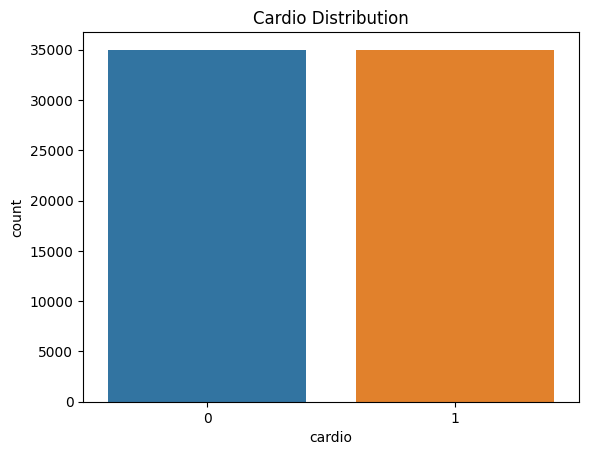

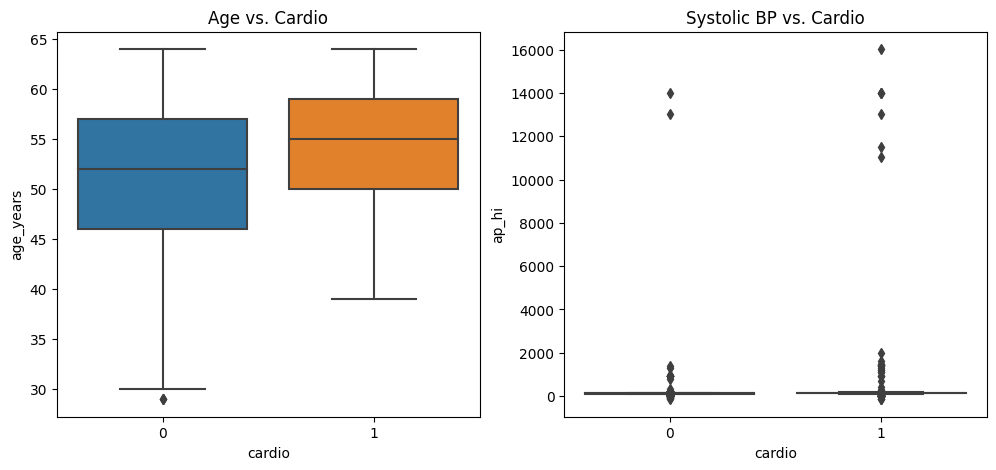

In [28]:
# Target Distribution
sns.countplot(x='cardio', data=df)
plt.title('Cardio Distribution')
plt.show()
# Feature vs. Target (e.g., Age and BP)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='cardio', y='age_years', data=df)
plt.title('Age vs. Cardio')
plt.subplot(1, 2, 2)
sns.boxplot(x='cardio', y='ap_hi', data=df)
plt.title('Systolic BP vs. Cardio')
plt.show()

In [29]:
print("Dataset Shape:", df.shape)
print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- First 5 Rows ---")
display(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Basic Statistics ---")
display(df.describe())

Dataset Shape: (69976, 11)

--- Data Types ---
age_years        int64
gender           int64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
BMI            float64
dtype: object

--- First 5 Rows ---


,age_years,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
4,47,1,100,60,1,1,0,0,0,0,23.011177



--- Missing Values ---
age_years      0
gender         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
BMI            0
dtype: int64

--- Basic Statistics ---


,age_years,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,52.840874,1.349648,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771,27.557610
std,6.767103,0.476862,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004,6.092210
min,29.000000,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.391837
75%,58.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.000000,2.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_594/1456523522.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_594/1456523522.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_la

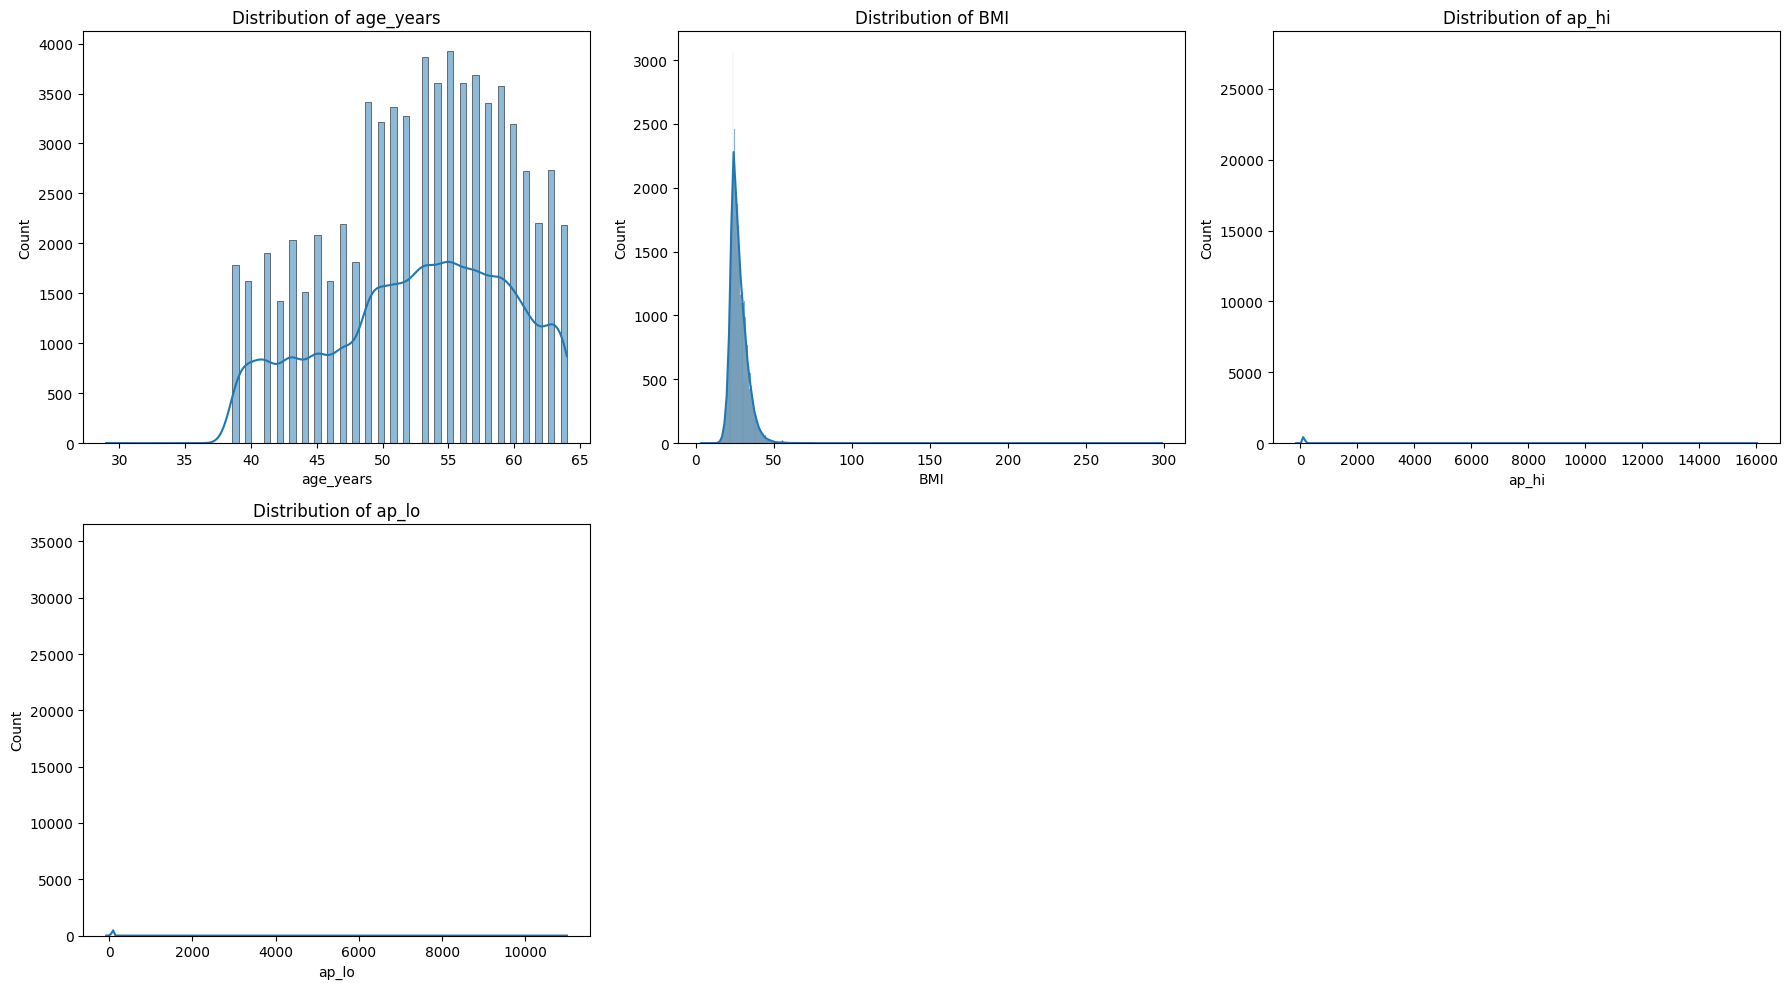

In [30]:
num_cols = ["age_years", "BMI", "ap_hi", "ap_lo"]

plt.figure(figsize=(18, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)   # 2 rows × 3 columns
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()

plt.show()

/tmp/ipykernel_594/1986702953.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_594/1986702953.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_594/1986702953.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_594/1986702953.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_594/1986702953.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_594/1986702953.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


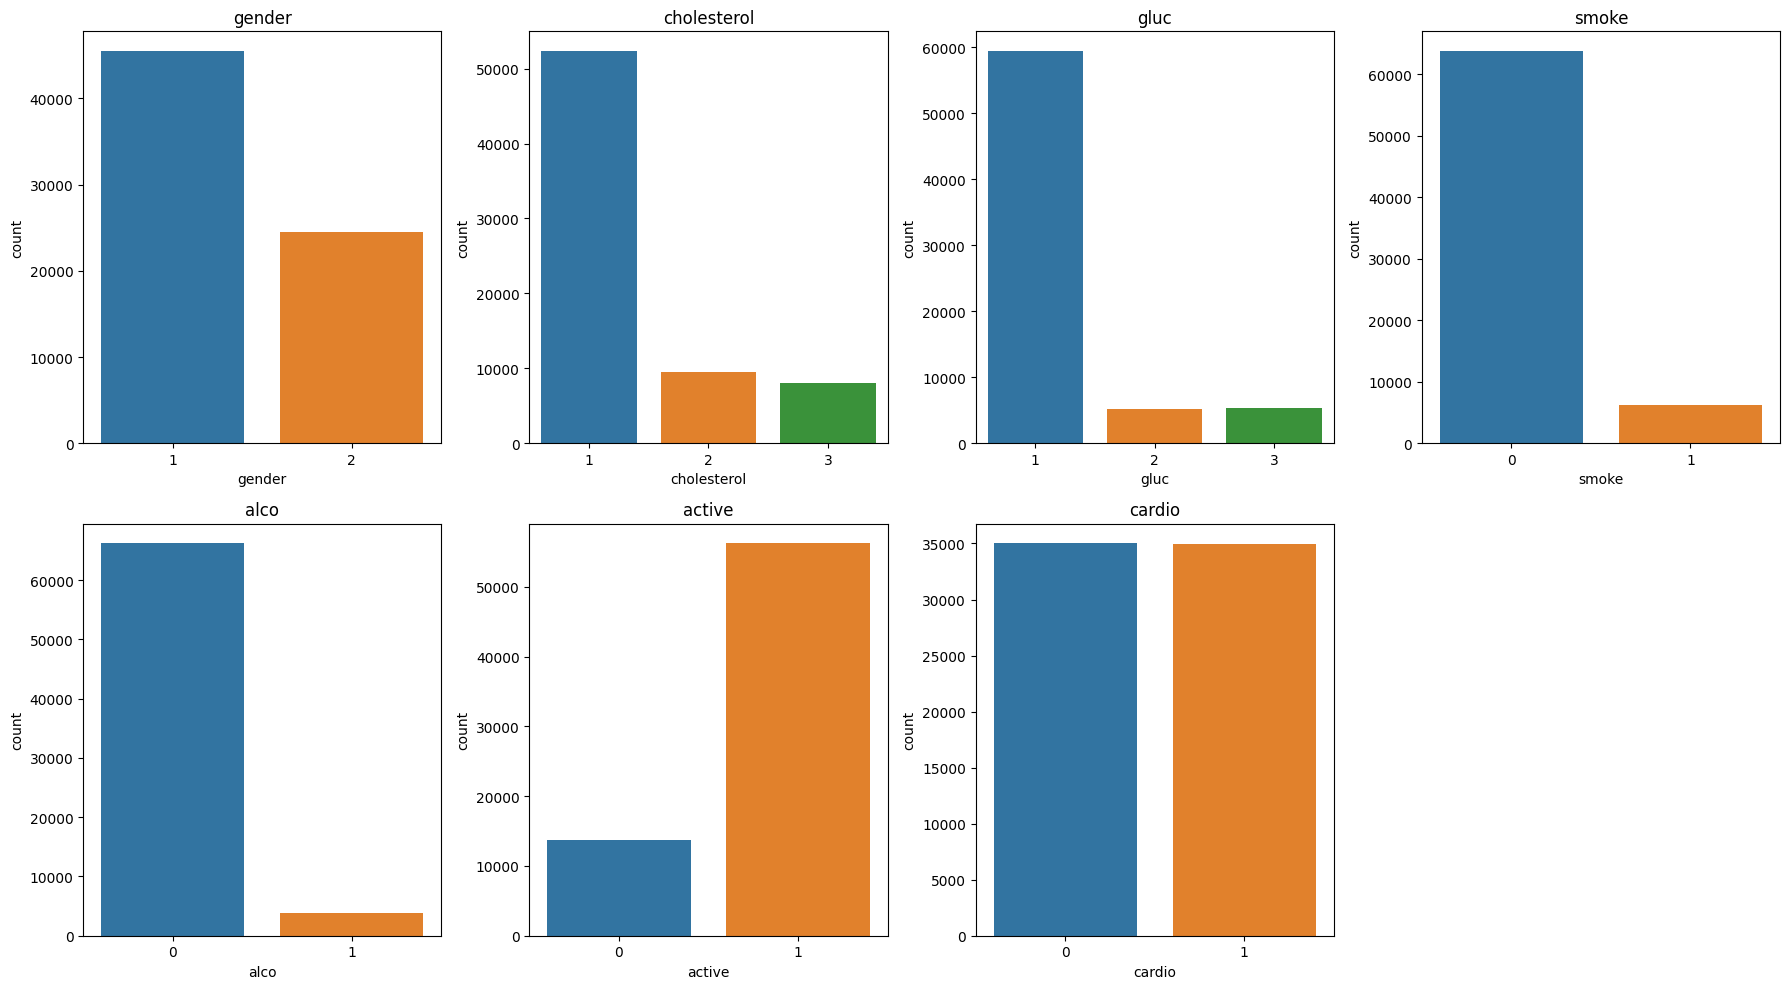

In [31]:
cat_cols = ["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]

# Determine grid size
rows = 2
cols = 4

plt.figure(figsize=(18, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=df[col])
    plt.title(f"{col}")
    plt.tight_layout()

plt.show()

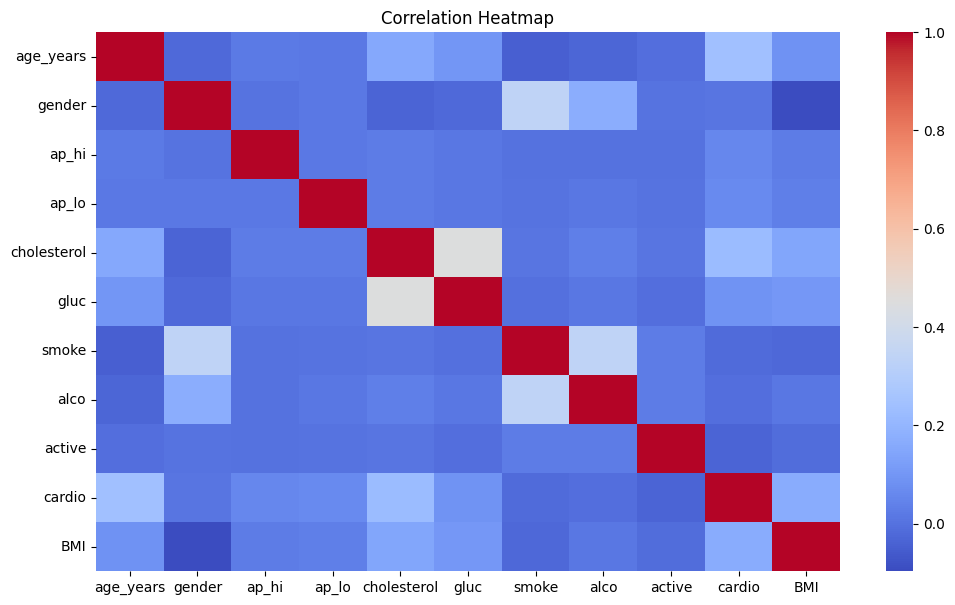

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipykernel_594/3373517667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_594/3373517667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_594/3373517667.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


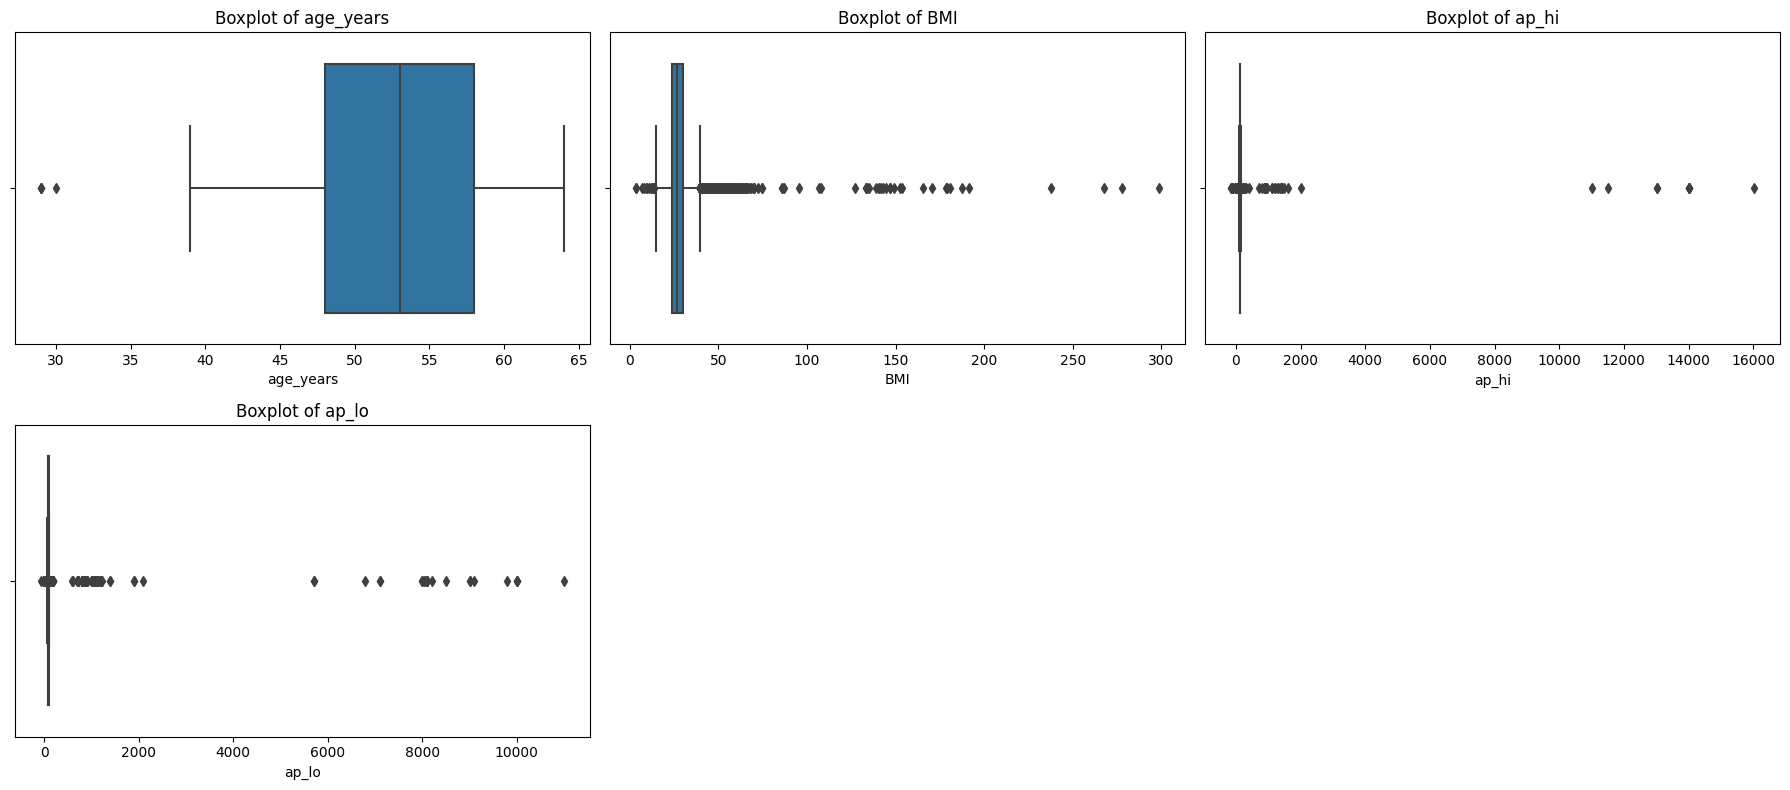

In [33]:
plt.figure(figsize=(18, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)   # 2 rows × 3 columns
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()

In [34]:
df.head()


,age_years,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,110,80,1,1,0,0,1,0,21.967120
1,55,1,140,90,3,1,0,0,1,1,34.927679
2,51,1,130,70,3,1,0,0,0,1,23.507805
3,48,2,150,100,1,1,0,0,1,1,28.710479
4,47,1,100,60,1,1,0,0,0,0,23.011177


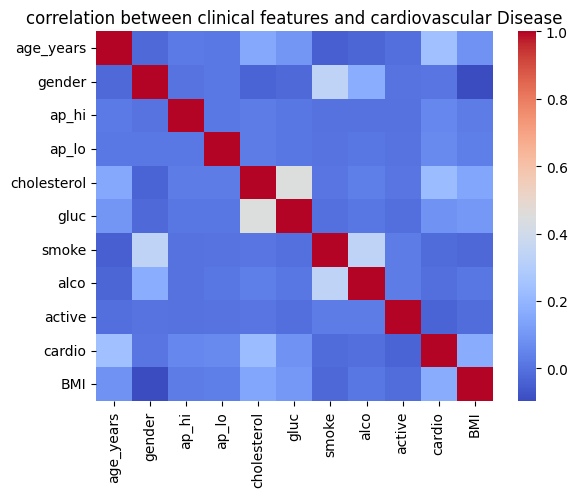

In [35]:
#exploetatory data anaylysis
corr= df.corr()
plt.Figure(figsize=(20,12))
sns.heatmap(corr,cmap='coolwarm')
plt.title("correlation between clinical features and cardiovascular Disease")
plt.show()


In [36]:
df.select_dtypes(include=['number']).columns

Index(['age_years', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'BMI'],
      dtype='object')

In [37]:
df=df.apply(pd.to_numeric,errors='coerce')

<Axes: >

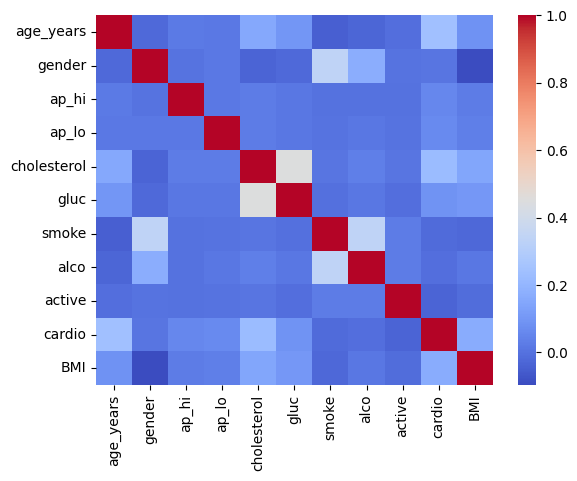

In [38]:
df_corr=df.corr()
sns.heatmap(df_corr,cmap='coolwarm')

/tmp/ipykernel_594/825100380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_prev=df.groupby('age_group')['cardio'].mean()


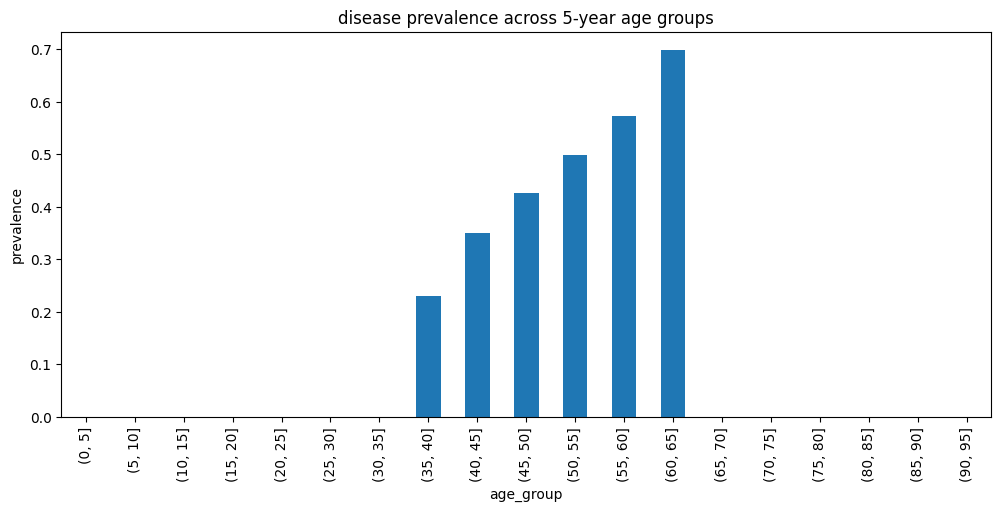

In [39]:
df['age_group']=pd.cut(df['age_years'],bins=range(0,100,5))
age_prev=df.groupby('age_group')['cardio'].mean()
age_prev.plot(kind='bar',figsize=(12,5))
plt.title("disease prevalence across 5-year age groups")
plt.ylabel("prevalence")
plt.show()

In [40]:
df.columns

Index(['age_years', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'BMI', 'age_group'],
      dtype='object')

In [41]:
def bp_category(row):
    if row['ap_hi']<120 and row['ap_lo']<80:
      return'normal'
    elif 120<=row['ap_hi']< 140 or 80<=row['ap_lo']<90:
       return'prehypertesion'
    elif 140<=row['ap_hi']<160 or 90<=row['ap_lo']<100:
       return 'stage1 hypertesion'
    else:
       return 'stage2 hypertesion'
df['bp_category']=df.apply(bp_category,axis=1)

In [42]:
# import plotly.express as px
# import plotly.io as pio
# pio.renderers.default="browser"
# fig=px.scatter(
#     df,
#     x='ap_lo',
#     y='ap_hi',
#     color='gender',
#     size='age_years',
#     hover_data=['smoke']
# )
# fig.show()


In [43]:
# table=pd.crosstab(df['gender'],df['cardio'])
# chi2, p ,dof, expected=chi2_contingency(table)

In [44]:
# age_1=df[df['cardio']==1]['age_years']
# age_0=df[df['cardio']==0]['age_years']
# t,p=ttest_ind(age_1,age_0)

In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
def create_dl_model():
    model = Sequential([
        Dense(256, input_shape=(10,), use_bias=False),
        BatchNormalization(),
        Dense(256, activation='relu'),
        Dropout(0.3),

        Dense(128, use_bias=False),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.3),

        Dense(64, use_bias=False),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dropout(0.3),

        Dense(32, use_bias=False),
        BatchNormalization(),
        Dense(32, activation='relu'),
        Dropout(0.3),

        Dense(16, use_bias=False),
        BatchNormalization(),
        Dense(16, activation='relu'),
        Dropout(0.3),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [47]:
# Create and summarize the model to confirm the architecture
model = create_dl_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1764088991.230588     594 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,873 (530.75 KB)

 Trainable params: 134,881 (526.88 KB)

 Non-trainable params: 992 (3.88 KB)

In [48]:
history = model.fit(
    x_train, y_train,
    epochs=30,           
    batch_size=32,       
    validation_split=0.2,
    verbose=1,
)

Epoch 1/30


I0000 00:00:1764088995.725961     646 service.cc:148] XLA service 0x7ab3a00029a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764088995.726045     646 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764088996.314312     646 cuda_dnn.cc:529] Loaded cuDNN version 90300


  56/1177 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5626 - loss: 0.7554

I0000 00:00:1764088999.886390     646 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1177/1177 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6658 - loss: 0.6258 - val_accuracy: 0.7285 - val_loss: 0.5579
Epoch 2/30
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7154 - loss: 0.5767 - val_accuracy: 0.7259 - val_loss: 0.5578
Epoch 3/30
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7172 - loss: 0.5744 - val_accuracy: 0.7236 - val_loss: 0.5576
Epoch 4/30
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7159 - loss: 0.5713 - val_accuracy: 0.7220 - val_loss: 0.5570
Epoch 5/30
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7202 - loss: 0.5708 - val_accuracy: 0.7218 - val_loss: 0.5556
Epoch 6/30
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7188 - loss: 0.5738 - val_accuracy: 0.7247 - val_loss: 0.5580
Epoch 7/30
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7213 - loss: 0.5687 - val_accuracy: 0.7256 - val_loss: 0.5550
Epoch 8/30
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7186 - loss: 0.5686 - val_accura

In [49]:
y_pred_prob = model.predict(x_test)

# Convert probabilities to 0 or 1
y_pred = (y_pred_prob > 0.5).astype(int)  

# Calculate the final accuracy score
test_acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_acc:.2f}")

491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test Accuracy: 0.74


In [51]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

In [54]:
# Encoder
input_layer = Input(shape=(10,))
encoded = Dense(6, activation='relu')(input_layer)
encoded = Dense(3, activation='relu', name='bottleneck')(encoded)

# Decoder
decoded = Dense(6, activation='relu')(encoded)
decoded = Dense(10, activation='linear')(decoded)

# Full Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │            70 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = autoencoder.fit(
    x_scaled, x_scaled,
    epochs=30,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.8478 - val_loss: 0.5041
Epoch 2/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4693 - val_loss: 0.4107
Epoch 3/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4019 - val_loss: 0.3848
Epoch 4/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3836 - val_loss: 0.3781
Epoch 5/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3773 - val_loss: 0.3751
Epoch 6/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3752 - val_loss: 0.3735
Epoch 7/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3734 - val_loss: 0.3728
Epoch 8/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3710 - val_loss: 0.3719
Epoch 9/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3695 - val_loss: 0.3719
Epoch 10/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3693 - val_loss: 0.3713
Epoch 11/50
1569/1569 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3702 - val_loss: 0.3708
Epoch 12/50
1569/1569 ━━━━━━━━

In [58]:
# Encoder model that outputs the bottleneck layer
encoder = Model(
    inputs=input_layer,
    outputs=autoencoder.get_layer('bottleneck').output
)

# Generate compressed representation
x_encoded = encoder.predict(x_scaled)

1961/1961 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [76]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(x_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluate clustering
sil_score = silhouette_score(x_encoded, clusters)
db_score = davies_bouldin_score(x_encoded, clusters)
ch_score = calinski_harabasz_score(x_encoded, clusters)

print("\n--- Clustering Quality Metrics ---")
print(f"Silhouette Score:          {sil_score:.4f}")
print(f"KMeans Inertia (WSS):      {kmeans.inertia_:.4f}")


--- Clustering Quality Metrics ---
Silhouette Score:          0.6295  (higher is better)
KMeans Inertia (WSS):      56408.7812  (lower is better)
